<a href="https://colab.research.google.com/github/jarrydmartinx/ml-basics/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

###### COMP4670/8600 - Introduction to Statistical Machine Learning - Tutorial 3

$\newcommand{\trace}[1]{\operatorname{tr}\left\{#1\right\}}$
$\newcommand{\Norm}[1]{\lVert#1\rVert}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\inner}[2]{\langle #1, #2 \rangle}$
$\newcommand{\DD}{\mathscr{D}}$
$\newcommand{\grad}[1]{\operatorname{grad}#1}$
$\DeclareMathOperator*{\argmin}{arg\,min}$

Setting up the environment

In [0]:
! pip install -q plotnine
! pip install dm-sonnet==1.29

    100% |████████████████████████████████| 3.6MB 7.6MB/s 
    100% |████████████████████████████████| 10.1MB 2.6MB/s 
    100% |████████████████████████████████| 61kB 12.4MB/s 
    100% |████████████████████████████████| 81kB 21.3MB/s 
fastai 1.0.49 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.


In [0]:
! pip install pandas==0.23

    100% |████████████████████████████████| 11.7MB 2.7MB/s 
plotnine 0.5.1 has requirement pandas>=0.23.4, but you'll have pandas 0.23.0 which is incompatible.
mizani 0.5.4 has requirement pandas>=0.23.4, but you'll have pandas 0.23.0 which is incompatible.
fastai 1.0.49 has requirement numpy>=1.15, but you'll have numpy 1.14.0 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sonnet as snt
import plotnine as gg
import tensorflow as tf
import scipy.optimize as opt
from sklearn import datasets

%matplotlib inline

## The data set


We will use an old dataset on the price of housing in Boston (see [description](https://archive.ics.uci.edu/ml/datasets/Housing)). The aim is to predict the median value of the owner occupied homes from various other factors. We will use a normalised version of this data, where each row is an example. The median value of homes is given in the first column (the label) and the value of each subsequent feature has been normalised to be in the range $[-1,1]$. Download this dataset from [mldata.org](http://mldata.org/repository/data/download/csv/housing_scale/).

Read in the data using ```np.loadtxt``` with the optional argument ```delimiter=','```.

Check that the data is as expected using ```print()```. Use ```np.delete``` and ```del``` to remove the column containing the binary variable 'chas' and the corresponding label, respectively. ```names.index('chas')``` is a convenient way to get the index of that column. This should give you an ```np.ndarray``` with 506 rows (examples) and 13 columns (1 label and 12 features).

In [0]:
# Evaluate cell without going to next: CTRL, ENTER
# Evaluate single line: CTRL SHIFT ENTER

In [0]:
names = ['medv', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']

In [0]:
dogs = 'DOGS'
dogs.lower()

'dogs'

In [0]:
# replace this with your solution
raw_data = datasets.load_boston()
column_names=[name.lower() for name in raw_data['feature_names']]
data = pd.DataFrame(raw_data['data'], columns=column_names)
data['target'] = raw_data['target']

In [0]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Plotting

Plotting is done using the [matplotlib](http://matplotlib.org/) toolbox. For example:
* Matplotlib has two interfaces. The first is an object-oriented (OO) interface. In this case, we utilize an instance of axes.Axes in order to render visualizations on an instance of figure.Figure.
* The second is based on MATLAB and uses a state-based interface. This is encapsulated in the pyplot module. See the pyplot tutorials for a more in-depth look at the pyplot interface.

## Elements of a plot
* The **Figure** is the final image that may contain 1 or more axes
    * It is like the canvas
* The **Axes** represent an individual plot (don't confuse with the word 'axis')
    * This is the particular part of the canvas on which we will make a particular visualisation
* Figures can have multiple axes on them



In [0]:
# See the available plot styles
for name in plt.style.available:
    print(name)

In [0]:
x = [0, 1.2 , 2, 3, 5.1, 7, 8, 9]
y_1 = [1.1, 3, 2, 4, 5, 6, 8.1, 8.2]
y_2 = [4.2, 4.2, 4.1, 5,6, 3.2, 4.8, 6]

# We create a Figure instance and an Axes instance
fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(121)

# Now that we have a new Axes instance, we can plot on top of it
ax.plot(x,y1,'b--')
ax.plot(x,y1,'bs',label='y1')
ax.plot(x,y2,'r:')
ax.plot(x,y2,'r>',label='y2')

# We can set the ttile and labels for each axis (AXIS!! not Axes object)
ax.set_title('Some random data')
ax.set_ylabel('labels')
ax.legend(loc='upper left', numpoints=1)

# Now we can create another Axes instance (our second subplot)
ax = fig.add_subplot(122)
ax.plot(x,y1,'bo')
# It has its own title, and axis labels
ax.set_title('same data as before, without lines')
ax.set_xlabel(r'examples (symbols, e.g. $\alpha,\beta,\gamma$, works)')


Plot the median value of the property (vertical axis) versus the tax rate (horizontal axis).

In [0]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Text(0.5, 1.0, 'Boston Housing Data')

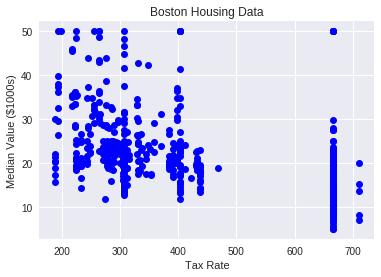

In [0]:
# If we want to plot a single Axes on a single Figure
fig, ax = plt.subplots()
ax.plot(data.tax, data.target, 'bo')
ax.set_xlabel('Tax Rate')
ax.set_ylabel('Median Value ($1000s)')
ax.set_title('Boston Housing Data')

Text(0, 0.5, 'Median Value ($1000s)')

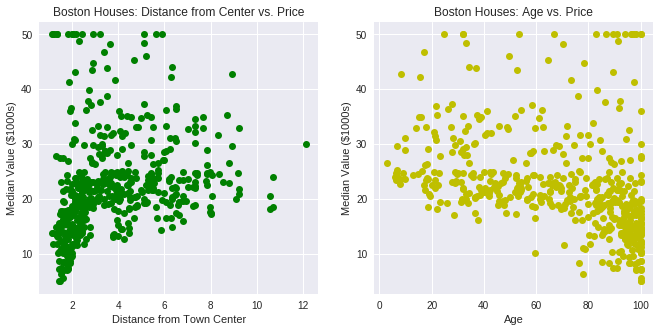

In [0]:
fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(121)
ax.plot(data.dis, data.target, 'go')
ax.set_title('Boston Houses: Distance from Center vs. Price')
ax.set_xlabel('Distance from Town Center')
ax.set_ylabel('Median Value ($1000s)')

ax_right = fig.add_subplot(122)
ax_right.plot(data.age, data.target, 'yo')
ax_right.set_title('Boston Houses: Age vs. Price')
ax_right.set_xlabel('Age')
ax_right.set_ylabel('Median Value ($1000s)')


## Non-linear regression with TensorFlow

In [0]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
# Get the data as numpy arrays
# Glossary of shapes: D = size of dataset, B = batch size, M = num_features

targets = data.target.as_matrix()  # [D]

features = data.drop('target', axis=1).as_matrix()  # [D, M]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [0]:
BATCH_SIZE = 32
TRAINING_STEPS = 100
LEARNING_RATE = 1e-3
HIDDEN_SIZES = [50, 50]

In [0]:

tf.reset_default_graph()

# Make the input placeholders
inputs = tf.placeholder(shape=(None, *features.shape[1:]), dtype=features.dtype)
outputs = tf.placeholder(shape=(None,), dtype=targets.dtype)  # [B]

# Make a MLP
model = snt.nets.MLP(HIDDEN_SIZES + [1])

# Forward pass
prediction = model(inputs)  # [B, 1]

# MSE loss
loss = tf.square(prediction - outputs) + tf.reduce_sum(tf.square(model.variables)) # [B, 1]

# Make an optimiezr & sgd op 
optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE)
sgd_op = optimizer.minimize(loss)

# Use fancy pants way to run sgd each time you ask for the loss
with tf.control_dependencies([sgd_op]):
    loss = tf.reduce_mean(loss)  # []
    
# Make sess boyz
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Now make a 'python callable' that uses the session to do things.
train = sess.make_callable({'loss': loss}, feed_list=[inputs, outputs])

# Training loop
results = []
for step in range(TRAINING_STEPS):
    # Make a minibatch
    batch_idxs = np.random.randint(low=0, high=len(targets), size=BATCH_SIZE)
    minibatch = features[batch_idxs], targets[batch_idxs]
    # Do SGD and get loss out
    result = train(*minibatch)
    result.update({'step': step, 'my_noise': np.random.rand()})
    results.append(result)

# Sik1
results = pd.DataFrame(results)

In [0]:
xs = results.step.values
ys = results.loss.values

plt.plot(xs, ys)
plt.xlabel('Training Steps')
plt.ylabel('Minibatch Loss')

plt.title('Training Loss')

In [0]:
# `optimizer.minimize(loss)` does two things:
grads_and_vars = optimizer.compute_gradients(loss, model.variables)
optimizer.apply_gradients(grads_and_vars)

## Regression without regularization

Implement the sum of squares error function to find the maximum likelihood solution $w_{ML}$ for the regression problem. Implement subroutines for polynomial basis function of degree 2. See [expansion based on binomial formula](http://en.wikipedia.org/wiki/Polynomial_kernel).

In [0]:
# replace this with your solution

## Training and testing

Use half of the available data for training the model using maximum likelihood. The rest of the data is allocated to the test set. Report the root mean squared error (RMSE) for the training set and the test set.

In [0]:
# replace this with your solution

Using the standard basis function (no transformations), find the feature with the biggest weight. Plot two figures, one for the training set and one for the test set. In each figure, plot the label against the this most important feature. Also include a line showing your maximum likelihood predictor (*Hint: use* ```np.arange``` *to generate data*).

In [0]:
# replace this with your solution

## Regression with regularization

Implement the regularized least squares regression to find the maximum likelihood solution $w_{reg}$ with regularizer $\lambda>0$. (Warning: the keyword ```lambda``` is a reserved word in Python).

In [0]:
# replace this with your solution

Similar to the previous exercise, plot two figures showing the most important feature along with the label and prediction. Use $\lambda = 1.1$.

In [0]:
# replace this with your solution

## Analysis of results

Compare the RSME of regression with and without regularization. By also considering the plots, describe what you observe and explain your observations.

### <span style="color:blue">Answer</span>
<i>--- replace this with your solution ---</i>

## (optional) Exploration of basis functions and regularization parameter

The choice of basis function as well as the value of the regularization parameter $\lambda$ affects the performance of the predictor. Using the same training and test data as before, compute the different RMSE for:
* The standard basis (as done above)
* polynomial basis function of degree 2.
* $\lambda$ = [0.01, 0.1, 1, 10, 100]

In [0]:
# replace this with your solution